# 🚢 로지스틱 회귀 : 타이타닉 생존자 예측하기

## 📞 라이브러리 및 데이터 불러오기

### 라이브러리 임포트

In [ ]:
import pandas as pd
# 데이터 프레임 내부의 값을 소수점 2자리까지만 표시
pd.options.display.float_format = '{:.2f}'.format

### 데이터셋 읽기

In [ ]:
# https://www.kaggle.com/competitions/titanic/data
file_url = "https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/"
# 맨 첫째줄 PassengerId를 index열로 지정
train = pd.read_csv(f'{file_url}/titanic_train.csv', index_col=0)
submission = pd.read_csv(f'{file_url}/titanic_test.csv', index_col=0)

In [ ]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


In [ ]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S


In [ ]:
# 데이터가 가지고 있는 변수 확인
train.info()
# Column : 변수 이름
# Non-Null Count : 결측치
# Dtype : 자료형

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**독립변수**
* Pclass : 티켓 클래스
* SibSp : 동승한 형제(Siblings)와 배우자(Spouse) 수
* Parch : 동승한 부모(Parents)와 자식들(Children) 수
* Ticket : 티켓 번호
* Fare : 요금
* Cabin : 호실
* Embarked : 승선한 항구

**종속변수**
* Survived : 생존 여부

In [ ]:
# 통계 정보 출력
train.describe()
# class는 1/2/3이 있음

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [ ]:
# Object 통계 정보
train.describe(include=["O"]) # Name, Ticket, Cabin 자체로는 의미 없음

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 상관관계 파악

In [ ]:
#@title df.corr()
train.corr()
# 상관관계 강도 해석 (절댓값)
# 0.2 이하 : 상관관계가 거의 없음
# 0.2 ~ 0.4 : 낮은 상관관계
# 0.4 ~ 0.6 : 중간 상관관계
# 0.6 ~ 0.8 : 높은 상관관계
# 0.8 이상 : 매우 높은 상관관계

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

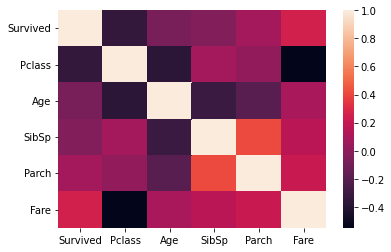

In [ ]:
#@title sns.heatmap()
sns.heatmap(train.corr())

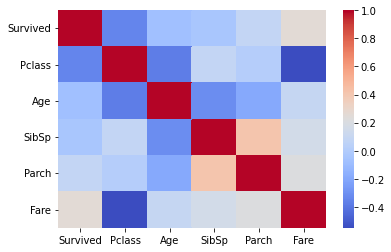

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm')

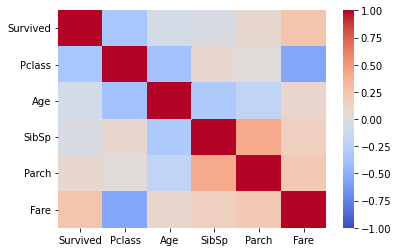

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm', vmin=-1, vmax=1)

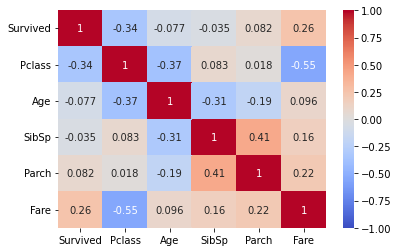

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

## 🛠 전처리

### 결측치 처리

In [ ]:
#@title df.isnull().sum()
# 결측치 갯수 확인
train.isnull().sum()
# Age, Cabin, Embaked

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
train.Embarked

In [ ]:
#@title Embarked
train.Embarked = train.Embarked.fillna("S")
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

#### Age
- 이름에서 경칭(title -> Mr, Mrs...) 추출 → title별 평균 연령으로 적용

In [ ]:
train['Title'] = train.Name.str.extract('([A-Za-z]+)\.')
train['Title'].value_counts(), train['Title'].unique()

(Mr          517
 Miss        182
 Mrs         125
 Master       40
 Dr            7
 Rev           6
 Mlle          2
 Major         2
 Col           2
 Countess      1
 Capt          1
 Ms            1
 Sir           1
 Lady          1
 Mme           1
 Don           1
 Jonkheer      1
 Name: Title, dtype: int64,
 array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
        'Jonkheer'], dtype=object))

In [ ]:
rarelist = []
for a in set(train['Title']):
    if list(train['Title']).count(a) < 10:
        rarelist.append(a)
rarelist

['Mme',
 'Sir',
 'Don',
 'Col',
 'Lady',
 'Dr',
 'Capt',
 'Major',
 'Countess',
 'Jonkheer',
 'Ms',
 'Rev',
 'Mlle']

In [ ]:
train['Title'] = train['Title'].replace(rarelist, 'Rare')

In [ ]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: Title, dtype: int64

In [ ]:
title_age_mean = train.groupby(['Title'])['Age'].mean()
title_age_mean

Title
Master    4.5742
Miss     21.7740
Mr       32.3681
Mrs      35.8981
Rare     42.3846
Name: Age, dtype: float64

In [ ]:
for v in train['Title'].unique():
    train.loc[train.Age.isnull() & (train.Title == v), 'Age'] = title_age_mean[v]

In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

In [ ]:
# 유의미한 차이를 보기 힘든 값들 drop
train_df = train.drop(columns=['Name', 'Ticket', 'Title', 'Cabin'])
train_df # 891 rows × 8 columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0000,1,0,7.2500,S
2,1,1,female,38.0000,1,0,71.2833,C
3,1,3,female,26.0000,0,0,7.9250,S
4,1,1,female,35.0000,1,0,53.1000,S
5,0,3,male,35.0000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0000,0,0,13.0000,S
888,1,1,female,19.0000,0,0,30.0000,S
889,0,3,female,21.7740,1,2,23.4500,S


### 범주형 변수 변환

In [ ]:
train_df = pd.get_dummies(train_df,
                          columns = ['Sex', 'Embarked'], drop_first=True)
train_df # 891 rows × 9 columns

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,22.0000,1,0,7.2500,1,0,1
2,1,1,38.0000,1,0,71.2833,0,0,0
3,1,3,26.0000,0,0,7.9250,0,0,1
4,1,1,35.0000,1,0,53.1000,0,0,1
5,0,3,35.0000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
887,0,2,27.0000,0,0,13.0000,1,0,1
888,1,1,19.0000,0,0,30.0000,0,0,1
889,0,3,21.7740,1,2,23.4500,0,0,1


In [ ]:
def pre_processing(df : pd.DataFrame):
    df.Embarked = df.Embarked.fillna("S")
    df.Fare = df.Fare.fillna(0)
    df['Title'] = df.Name.str.extract('([A-Za-z]+)\.')
    rarelist = [a for a in set(df['Title'])
                if list(df['Title']).count(a) < 10]
    df['Title'] = df['Title'].replace(rarelist, 'Rare')
    title_age_mean = df.groupby(['Title'])['Age'].mean()
    for v in df['Title'].unique():
        df.loc[df.Age.isnull() & (df.Title == v), 'Age'] = title_age_mean[v]
    df_clean = df.drop(columns=['Name', 'Ticket', 'Title', 'Cabin'])
    return pd.get_dummies(df_clean,
                          columns = ['Sex', 'Embarked'], drop_first=True)

## 🗽 모델링

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

X, y = (train_df.drop(columns=['Survived']),
                    train_df['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 100)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## 🏁 예측
* 모델을 활용해 예측

In [ ]:
pred = model.predict(X_test)

## 👀 예측 모델 평가
* 정확도 : 예측값과 실젯값을 비교하여 얼마나 맞추었는지 확인

In [ ]:
#@title accuracy_score()
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.7988826815642458

In [ ]:
model.coef_

array([[-1.12697841, -0.04534381, -0.30923645, -0.22977453,  0.00318319,
        -2.54554844,  0.03374822, -0.09098989]])

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
pd.Series(model.coef_[0], index = X.columns)

Pclass       -1.1270
Age          -0.0453
SibSp        -0.3092
Parch        -0.2298
Fare          0.0032
Sex_male     -2.5455
Embarked_Q    0.0337
Embarked_S   -0.0910
dtype: float64

## 🥕 이해

### 피처 엔지니어링 (Feature Engineering)
* 기존 데이터를 손보아 더 나은 변수를 만드는 기법
    * 예) 더미 변수
* 도메인 지식의 활용이 중요
    * 데이터에 사전 지식이 있으면 어떤 변수를 어떻게 바꾸면 더 나은 피처를 얻을 수 있을지 파악 가능
    * 도메인 지식을 바탕으로 정확한 목적을 가지고 수행하는 피처 엔지니어링이 더욱 효율적

#### 다중공선성(Multicolinearity) 문제
* 선형 회귀 분석, 로지스틱 회귀 분석 등 선형 모델에서 **독립변수 사이에 상관관계가 높은 때에 발생하는 문제**
* 특정 독립변수 간의 상관관계가 매우 높다면 종속변수의 변화 요인이 정확히 어떤 변수 때문인지 불투명해짐
* 선형 모델은 독립변수 간의 독립성을 전제로 하기 때문에, 다중공선성 문제를 해결해주는 것이 좋음
---
* **해결책**
    * 상관관계가 높은 변수 중 하나를 제거
    * 둘을 모두 포괄시키는 새로운 변수 생성
    * PCA 등의 방법으로 차원 축소를 수행
        * **PCA**(Principal Component Analysis, 주성분 분석)
---

In [ ]:
#@title SibSp & Parch → Family 변수로 변경
train_df['Family'] = train_df['SibSp'] + train_df['Parch']
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family
PassengerId,,,,,,,,
1,0,3,22.0000,7.2500,1,0,1,1
2,1,1,38.0000,71.2833,0,0,0,1
3,1,3,26.0000,7.9250,0,0,1,0
4,1,1,35.0000,53.1000,0,0,1,1
5,0,3,35.0000,8.0500,1,0,1,0


In [ ]:
X, y = (train_df.drop(columns=['Survived']),
                    train_df['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 100)
model2 = LogisticRegression()
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7988826815642458

In [ ]:
pd.Series(model2.coef_[0], index = X.columns)

Pclass       -1.1031
Age          -0.0433
Fare          0.0026
Sex_male     -2.6238
Embarked_Q   -0.1382
Embarked_S   -0.3709
Family       -0.2219
dtype: float64

### 로지스틱 회귀 `Logistic Regression`
* 로지스틱 함수 Logistic function 를 사용하여 선형 회귀 분석의 직선 형태를 1과 0에 한없이 가까워지는 곡선 형태로 바꿔줌
![Linear Regression VS Logistic Regression](https://github.com/bigdata-young/bigdata_16th/blob/main/image/logistic_regression.png?raw=true)
* 기본적으로 0.5를 기준으로 1과 0으로 변환시킨 값을 보여줌

## 🏆 Kaggle Competion 제출

In [ ]:
submission_df = pre_processing(submission)
submission_df

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,34.5000,0,0,7.8292,1,1,0
893,3,47.0000,1,0,7.0000,0,0,1
894,2,62.0000,0,0,9.6875,1,1,0
895,3,27.0000,0,0,8.6625,1,0,1
896,3,22.0000,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
1305,3,32.0000,0,0,8.0500,1,0,1
1306,1,39.0000,0,0,108.9000,0,0,0
1307,3,38.5000,0,0,7.2500,1,0,1


In [ ]:
pred = model.predict(submission_df)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
result = pd.DataFrame({'PassengerId':submission_df.index,'Survived' :pred})
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv('submission.csv', index=False)

In [ ]:
!pip install mlxtend --quiet
import joblib

joblib.dump(model, 'first_model.pkl') 

['first_model.pkl']

In [ ]:
model_from_joblib = joblib.load('first_model.json')
pd.Series(model_from_joblib.coef_, index = X.columns)

age                  263.73
bmi                  311.71
children             473.10
smoker             23492.02
sex_male              12.46
region_northwest    -403.28
region_southeast    -917.67
region_southwest   -1116.44
dtype: float64